<a href="https://colab.research.google.com/github/R267/Marchenko-lab5/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')

print('Data source import complete.')


100%|██████████| 199k/199k [00:00<00:00, 47.0MB/s]

Extracting files...
Data source import complete.


<div
     style="padding: 20px;
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #66023C;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #F28C28;"
     >
    🏆 Machine Learning Grandmaster
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #e8f4ff;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Welcome to ML Grandmaster, where we'll take a look at the most important Machine Learning algorithms and fundamental concepts from the ground up. <br>
    We'll look at the theory behind the concepts and also the code to implement these ideas in the real world.
</div>

## ML Grandmaster Notebooks
<br>
<div
     style="float: left; position: relative; width: 100%;"
     >
    <table
           style="float: left; font-size: 16px"
           >
      <tr>
        <th><b>📈 Machine Learning Fundamentals</b></th>
        <th><b>🌳 Decision Trees</b></th>
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-linear-regression/">Linear Regression</a></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier">Decision Tree Classification</a></td>
      </tr>
      <tr>
        <td>Logistic Regression [work in progress]</td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor">Decision Tree Regression</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">Random Forest</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">Gradient Boosting (XGBoost)</a></td>
      </tr>
    </table>
</div>

<div
     style="padding: 20px;
            color: white;
            font-size: 250%;
            text-align: center;
            display: fill;
            border-radius: 5px;
            background-color: #023c66;
            overflow: hidden;
            font-weight: 700;
            border: 5px solid #7ace07;"
     >
    🌳 Decision Tree Regression
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In this ML Grandmaster notebook, we'll be taking a look at Decision Tree Regression from the ground up. <br>
</div>

![regression tree](https://i.kym-cdn.com/editorials/icons/original/000/004/844/wise_mystical_tree_lore.jpg)

# 👉 Contents
* [📚 Prerequisites and Notes](#0)
* [🤨 Intuition](#1)
* [🚚 Import](#2)
    - [Packages](#2.1)
    - [Dataset](#2.2)
* [♻️ CART Algorithm](#3)
* [🪓 Mean Squared Error | Splitting Criterion](#4)
* [🧱 Building the Tree](#5)
    - [CART Step 1](#5.1)
    - [CART Step 2](#5.2)
    - [CART Step 3](#5.3)
    - [Minimum Samples Split](#5.4)
* [💻 Code Implementation](#6)
* [🙇 Conclusion](#7)

<a id="0"></a>
# 📚 Prerequisites and Notes

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    There are no prerequisites for this notebook.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Similar topic: <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">Decision Tree Classification</a>. <br>
    While the Decision Tree is almost never used in the real world, it is the fundamental building block for more powerful and popular algorithms like Random Forests and XGBoost. <br>
    Random Forest notebook: <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">🌳 Random Forest</a>. <br>
    Gradient Boosting (XGBoost) notebook: <a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">🌳 Gradient Boosting (XGBoost)</a>.
</div>

<a id="1"></a>
# 🤨 Intuition

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    A Decision Tree tries to model one or more output values, given one or more input values. <br>
    Its structure is that of a Binary Tree, and at each non-leaf node it makes a decision based on an input value via a logical statement that can be either True or False. <br>
    Based on the decisions in each non-leaf node, it generates an output in the leaf nodes.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In particular, a Decision Tree Regressor tries to model a continuous variable, a real number indicating some quantity. <br>
    Let's take a look at a simple Decision Tree Regressor.
</div>

![1.jpg](attachment:da777e6f-f632-4215-9121-25fafd214c34.jpg)

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The Decision Tree Regressor above was constructed based on rules that we decided. <br>
    Let's see how to build a Decision Tree Regressor starting from a dataset. <br>
    We'll be using a very simplified version of the house prices dataset. We'll try to predict a house's selling price based on some input features.
</div>

<a id="2"></a>
# 🚚 Import

<a id="2.1"></a>
## Packages

In [3]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.tree import DecisionTreeRegressor  # model

from matplotlib import pyplot as plt  # visualization
from sklearn.tree import plot_tree  # visualize tree

<a id="2.2"></a>
## Dataset

In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
def preprocess(df):
    cols_to_drop = [col for col in df.columns if col not in ['LotArea', 'SalePrice']]
    df['Pool'] = (df['PoolArea'] > 0).astype('int64')
    df['NewConstruction'] = (df['SaleType'] == 'New').astype('int64')
    df['SalePrice'] = df['SalePrice'] // 1000
    df = df.drop(columns=cols_to_drop)
    df = df[['NewConstruction', 'Pool', 'LotArea', 'SalePrice']]

    return df

In [6]:
df = df.loc[df.index.isin([197, 810, 11, 18, 1449])]
df = preprocess(df)
df

<ipython-input-5-3fe4e3a1e96a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pool'] = (df['PoolArea'] > 0).astype('int64')
<ipython-input-5-3fe4e3a1e96a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NewConstruction'] = (df['SaleType'] == 'New').astype('int64')
<ipython-input-5-3fe4e3a1e96a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,NewConstruction,Pool,LotArea,SalePrice
11,1,0,11924,345
18,0,0,13695,159
197,0,1,25419,235
810,0,1,10140,181
1449,0,0,1533,92


<a id="3"></a>
# ♻️ CART Algorithm

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    How do we determine the shape of our Decision Tree Regressor and which features to process in each node? <br>
    We do this by using the Classification And Regression Tree (CART) Algorithm. <br>
    Let's define it below.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For each node, until the number of samples to process within the node is greater than the <b>minimum samples to split</b> number: <br>
     <ol>
         <li>Find each feature's best split. If there are $ k $ distinct values within a numeric feature, the number of possible splits among them is $ k - 1 $. Find the split which minimizes the <b>splitting criterion</b>.</li>
      <li>Among these best splits (which will be 1 for each feature), find the best. Once again, according to the <b>splitting criterion</b>.</li>
      <li>Split the node according to the best split found above. This will create 2 new nodes. Repeat the process until the conditions defined above are not valid anymore.</li>
    </ol>
</div>

<a id="4"></a>
# 🪓 Mean Squared Error | Splitting Criterion

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The splitting criterion we'll be using to build our tree is the Mean Squared Error. Given a real output value $ y_i $ and a predicted output value $ \hat{y}_i $, where $ i $ iterates over the $ n $ samples, the Mean Squared Error $ MSE $ is defined as follows:
    $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    So basically, we take the squared difference of our real outputs and our predicted outputs, sum them all up, and divide by the number of samples. <br>
    Our objective is to minimize the MSE in our leaf nodes. <br>
    In the best case scenario $ \hat{y}_i = y_i $ for each $ i $, which means that each prediction is equal to the real output, which in turn means $ MSE = 0 $.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    In our House Prices example, $ y_i $ will be the house's real selling price, and $ \hat{y}_i $ will our tree's predicted selling price. <br>
    Now we can start building our Decision Tree Regressor.
</div>

<a id="5"></a>
# 🧱 Building the Tree

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Now we have all we need to start building our tree, so let's go through the steps of the CART algorithm using our example dataset. <br>
</div>

In [7]:
df

,NewConstruction,Pool,LotArea,SalePrice
11,1,0,11924,345
18,0,0,13695,159
197,0,1,25419,235
810,0,1,10140,181
1449,0,0,1533,92


<a id="5.1"></a>
## CART Step 1

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Step 1 will be, for each feature, finding the value that splits our outputs into 2 groups of data, according to the $ MSE $. <br>
    For the NewConstruction and Pool features, there is only one possible split, since there are only 2 values in each feature. <br>
    The split value will be the mean of the 2 values. Since our 2 values are 0 and 1, our split will be at 0.5. <br>
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Once we've grouped our real $ y_i $ into 2 groups, for each group, we calculate our prediction $ \hat{y}_i $ to be the mean of the values within the group. <br>
    Then, we calculate the $ MSE $ using these 2 $ \hat{y}_i $ as our predicted values. <br>
    Let's clarify this process below by looking at the NewConstruction feature.
</div>

![2-1.jpg](attachment:b86056ba-7c7f-41cb-a5c1-871528bb97df.jpg)

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Since we can only split the NewConstruction feature one way, we have that the minimum $ MSE $ for this feature is 2101.75.
    $$ min(MSE_{NewConstruction}) = 2101.75 $$
</div>

In [8]:
df

,NewConstruction,Pool,LotArea,SalePrice
11,1,0,11924,345
18,0,0,13695,159
197,0,1,25419,235
810,0,1,10140,181
1449,0,0,1533,92


<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Let's also compute the $ MSE $, by hand, for the Pool feature, which can only be split one way, on 0.5.
</div>

![2-2.jpg](attachment:c155c0c7-c9a3-45ce-a9ed-aaf15e2cc0b6.jpg)

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Since we can only split the Pool feature one way, we have that the minimum $ MSE $ for this feature is 7164.5.
    $$ min(MSE_{Pool}) = 7164.5 $$
</div>

In [9]:
df

,NewConstruction,Pool,LotArea,SalePrice
11,1,0,11924,345
18,0,0,13695,159
197,0,1,25419,235
810,0,1,10140,181
1449,0,0,1533,92


<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For the LotArea, we have 5 distinct values, which means we have 4 ways to split the feature. <br>
    The values are, in sorted order: [1533, 10140, 11924, 13695, 25419]. <br>
    We calculate the 4 possible split values by taking the mean of each 2 adjacent data points. <br>
    Let's write some code to assist us in this task.
</div>

In [10]:
def get_split_values(df, feature):
    distinct_values = sorted(df[feature].unique())

    split_values = []
    for i in range(1, len(distinct_values)):
        split_val = (distinct_values[i-1] + distinct_values[i]) / 2
        split_values.append(split_val)

    return split_values

In [11]:
split_values = get_split_values(df, 'LotArea')
split_values

[np.float64(5836.5),
 np.float64(11032.0),
 np.float64(12809.5),
 np.float64(19557.0)]

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Our possible split values for LotArea are [5836.5, 11032.0, 12809.5, 19557.0]. <br>
    This means that we will compute 4 MSEs for LotArea and pick the smallest one, to get the best split for LotArea. <br>
    Since the task is pretty time intensive by hand, let's write some code to assist us.
</div>

In [12]:
# computing key split info given a feature and a split value
# this is the code implementation of what we did before by hand
def get_split_info(df, feature, split_val):
    df1 = df.loc[df[feature] <= split_val]
    df2 = df.loc[df[feature] > split_val]

    y1_values = df1['SalePrice'].values
    y1_pred = y1_values.mean()

    y2_values = df2['SalePrice'].values
    y2_pred = y2_values.mean()

    mse = 0
    for y1 in y1_values:
        mse += (y1 - y1_pred)**2

    for y2 in y2_values:
        mse += (y2 - y2_pred)**2

    n1 = len(y1_values)
    n2 = len(y2_values)
    n = n1 + n2

    mse /= n

    return {
        "split_value": split_val,
        "y1_pred": y1_pred,
        "n1": n1,
        "y2_pred": y2_pred,
        "n2": n2,
        "mse": mse
    }

In [13]:
split_info = []
for split_val in split_values:
    split_info.append(get_split_info(df, 'LotArea', split_val))
split_df = pd.DataFrame(split_info)
split_df

,split_value,y1_pred,n1,y2_pred,n2,mse
0,5836.5,92.00,1,230.000000,4,4138.400000
1,11032.0,136.50,2,246.333333,3,4290.233333
2,12809.5,206.00,3,197.000000,2,7166.000000
3,19557.0,194.25,4,235.000000,1,6919.750000


In [14]:
split_df.loc[split_df['mse'] == split_df['mse'].min()]

,split_value,y1_pred,n1,y2_pred,n2,mse
0,5836.5,92.0,1,230.0,4,4138.4


<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    As we can see, out of our 4 split values for LotArea, the one with smallest MSE is the split at 5836.5, with MSE of 4138.4.
    $$ min(MSE_{LotArea}) = 4138.4 $$
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And with this, we are done with step 1 of the CART Algorithm, for the first node in our Decision Tree Regressor.
</div>

<a id="5.2"></a>
## CART Step 2

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For our 3 input features, we've calculated the best split according to the MSE.
    $$ min(MSE_{NewConstruction}) = 2101.75 $$
    $$ min(MSE_{Pool}) = 7164.5 $$
    $$ min(MSE_{LotArea}) = 4138.4 $$
    
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    For Step 2, we find the smallest MSE of these, and so we pick the best feature, with the best split. <br>
    Our best feature is NewConstruction, with a split value of 0.5, and an MSE of:
    $$ MSE_{best} = 2101.75 $$
</div>

<a id="5.3"></a>
## CART Step 3

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And now for Step 3, our final step in our first iteration, we split the data according to the best split, thereby creating 2 new nodes, in which we can repeat the CART steps.
</div>

![3-1.jpg](attachment:c81b28a8-14cd-4303-a4e0-f55f66450282.jpg)

<a id="5.4"></a>
## Minimum Samples Split

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    How do we decide when to stop splitting a node, and keep a node's prediction as the mean of the samples within the node? <br>
    We do that by setting a Minimum Samples Split, which is the minimum number of samples within a node to start the split finding steps 1 through 3. <br>
    Let's say in our case, we set the Minimum Samples Split to 4. That means that we can't split the right node anymore, but we can split the left node.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Let's go through steps 1 through 3 in our left node, using the code we defined above.
</div>

In [15]:
df_left = df.loc[df['NewConstruction'] < 0.5]
df_left

,NewConstruction,Pool,LotArea,SalePrice
18,0,0,13695,159
197,0,1,25419,235
810,0,1,10140,181
1449,0,0,1533,92


In [16]:
split_values = get_split_values(df_left, 'Pool')
split_info = []
for split_val in split_values:
    split_info.append(get_split_info(df_left, 'Pool', split_val))
split_df = pd.DataFrame(split_info)
split_df

,split_value,y1_pred,n1,y2_pred,n2,mse
0,0.5,125.5,2,208.0,2,925.625


In [17]:
split_values = get_split_values(df_left, 'LotArea')
split_info = []
for split_val in split_values:
    split_info.append(get_split_info(df_left, 'LotArea', split_val))
split_df = pd.DataFrame(split_info)
split_df

,split_value,y1_pred,n1,y2_pred,n2,mse
0,5836.5,92.0,1,191.666667,3,764.666667
1,11917.5,136.5,2,197.000000,2,1712.125000
2,19557.0,144.0,3,235.000000,1,1074.500000


<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    The split with the lowest MSE is splitting the LotArea at 5836.5. <br>
    We split the left node, and this is the resulting tree.
</div>

![3-2.jpg](attachment:33212d6c-01f6-482e-bcad-8f0ac99c5cc8.jpg)

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    And now, since all leaf nodes contain less samples the the Minimum Samples Split number, our tree is complete! <br>
    In the next section we'll see how we'd do all this with just a few lines of code, with the help of scikit-learn.
</div>

<a id="6"></a>
# 💻 Code Implementation

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    sklearn's DecisionTreeRegressor will be doing all the heavy lifting, but now that we've seen how it works, we perhaps have a deeper appreciation of the open source community.
</div>

In [18]:
# defining our tree object with the hyper parameters discussed above
model = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    min_samples_split=4,
)

# CART algorithm that builds the tree based on our data
model.fit(
    X=df.drop(columns=['SalePrice']),
    y=df['SalePrice']
)

DecisionTreeRegressor(min_samples_split=4)

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    sklearn's plot_tree comes in handy so that we can visualize our Decision Tree Regressor.
</div>

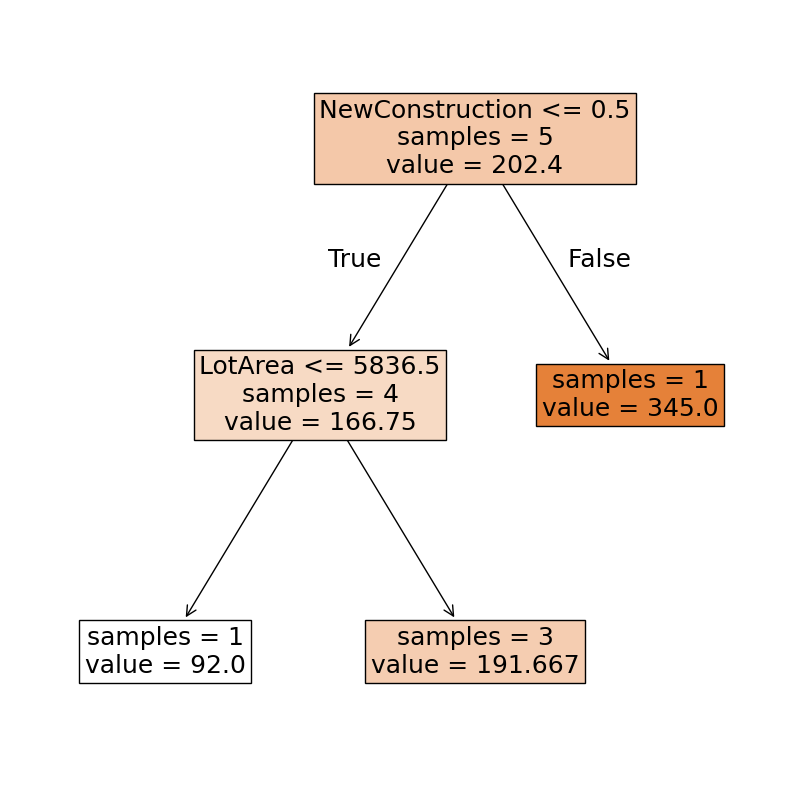

In [19]:
plt.figure(figsize=(10, 10))
plot_tree(
    model,
    feature_names=['NewConstruction', 'Pool', 'LotArea'],
    impurity=False,
    filled=True,
    fontsize=18
)
plt.show()

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    So now, if for example we were to feed in a house with NewConstruction = 0, Pool = 1 and LotArea = 7000, we'd use the predict method to derive the SalePrice.
</div>

In [20]:
inputs = pd.DataFrame([{"NewConstruction": 0, "Pool": 1, "LotArea": 7000}])
prediction = model.predict(inputs)
print(f"Predicted SalePrice: {prediction}")

Predicted SalePrice: [191.66666667]


<a id="7"></a>
# 🙇 Conclusion

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #d7ffd7;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    With this our notebook has come to an end. <br>
    If there are any mistakes, please point them out to me in the commets, this is a living and breathing document. <br>
    For related notebooks: <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier/">🌳 Decision Tree Classification</a>, <a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">🌳 Random Forest</a>, <a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">🌳 Gradient Boosting (XGBoost)</a>.
</div>

<div
     style="padding: 20px;
            color: #3b3b3b;
            font-size: 115%;
            text-align: left;
            display: fill;
            border-radius: 5px;
            background-color: #e8f4ff;
            overflow: hidden;
            font-weight: 600;
            border: 5px solid #ffcfa0;"
     >
    Stay tuned for more notebooks in the ML Grandmaster series. <br>
    I hope you find this series of notebooks useful/fun!
</div>

## ML Grandmaster Notebooks
<br>
<div
     style="float: left; position: relative; width: 100%;"
     >
    <table
           style="float: left; font-size: 16px"
           >
      <tr>
        <th><b>📈 Machine Learning Fundamentals</b></th>
        <th><b>🌳 Decision Trees</b></th>
      </tr>
      <tr>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-linear-regression/">Linear Regression</a></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-classifier">Decision Tree Classification</a></td>
      </tr>
      <tr>
        <td>Logistic Regression [work in progress]</td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-decision-tree-regressor">Decision Tree Regression</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/code/chazzer/ml-grandmaster-random-forest/">Random Forest</a></td>
      </tr>
      <tr>
        <td></td>
        <td><a href="https://www.kaggle.com/chazzer/ml-grandmaster-gradient-boosting-xgboost/">Gradient Boosting (XGBoost)</a></td>
      </tr>
    </table>
</div>

📘 Глосарій: Пояснення ключових термінів
Decision Tree Regressor (Дерево рішень для регресії)
Модель, яка будує дерево, в якому на кожному рівні відбувається розділення даних за певною ознакою, щоб мінімізувати похибку у передбаченні числової змінної.

Overfitting (Переобучення)
Ситуація, коли модель добре працює на тренувальних даних, але має погані результати на нових (тестових), через те, що занадто точно “запам’ятала” дані.

Feature Importance (Важливість ознак)
Оцінка того, наскільки кожна змінна впливає на передбачення моделі. У деревах рішень ця важливість розраховується на основі зменшення похибки.

Train-Test Split (Розділення на тренувальну і тестову вибірки)
Поділ даних для перевірки здатності моделі узагальнювати.

MAE / RMSE (Середні помилки)

MAE — середня абсолютна похибка.

RMSE — середньоквадратична похибка.
Ці метрики показують точність моделі регресії: чим менше значення, тим точніше передбачення.

🧪 Основні кроки виконання регресійного аналізу з деревом рішень
1. Завантаження та огляд даних

Використано набір даних "House Prices".

Перевірено наявність пропущених значень.

Вивчено розподіл числових та категоріальних змінних.

2. Попередня обробка даних

Заповнення пропущених значень середнім, медіаною або найчастішим значенням.

Перетворення категоріальних змінних у числові за допомогою One-Hot Encoding.

Застосування логарифмічного перетворення до цільової змінної (SalePrice), щоб нормалізувати розподіл.

3. Розділення даних

Дані поділено на тренувальну і тестову вибірки з використанням train_test_split.

Забезпечено, щоб модель навчалася лише на частині даних, а решта використовувалась для перевірки.

4. Побудова моделі дерева рішень

Ініціалізовано DecisionTreeRegressor з параметрами (max_depth, min_samples_split тощо).

Навчено модель на тренувальній вибірці.

Виконано передбачення (predict) для тестових даних.

5. Оцінка результатів

Обчислено MAE та RMSE для кількісної оцінки точності.

Побудовано графік справжніх vs передбачених значень.

Побудовано графік важливості ознак (feature_importances_), щоб зрозуміти, які змінні найбільше впливають на ціну.

6. Інтерпретація

Модель дерева легко інтерпретується: її можна візуалізувати, вона показує логіку прийняття рішень.

Модель може переобучитися, якщо глибина дерева не обмежена.

Обмеження глибини (max_depth) допомагає контролювати узагальнення.

Найважливіші змінні виявились: OverallQual, GrLivArea, YearBuilt.

🔗 Корисні посилання
Scikit-learn DecisionTreeRegressor

MAE vs RMSE: що краще

One-Hot Encoding — пояснення

